<a href="https://colab.research.google.com/github/JacksonLeb/tensorflow_learning/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network classification with tensorflow
#Binary, Multiclass and Multilabel classification

##creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [3]:
X[0]

array([0.75424625, 0.23148074])

In [4]:
y[0]

1

#visualizing our data

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


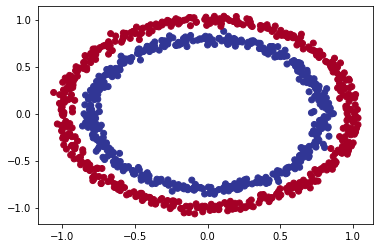

In [6]:
#visualize with plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

#input and output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
import tensorflow as tf

#set the random seed
tf.random.set_seed(42)

#creating the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#compiling the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"]
              )

#fit the model
model_1.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4990
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.4950
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4820
Epoch 11/

In [9]:
model_1.fit(X, y, epochs=200)
model_1.evaluate(X, y)

Epoch 1/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.4720
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.4890
Epoch 3/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6946 - accuracy: 0.4740
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4850
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.4660
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5010
Epoch 7/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.5030
Epoch 8/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.4810
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4790
Epoch 10/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.4790
Epoch 11/

[0.6934831142425537, 0.5]

In [10]:
#creating the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

#compiling the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"]
              )

#fit the model
model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.9159 - accuracy: 0.4790
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7433 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7192 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7070 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.5060
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.4920
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.5050
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5050
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4940
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4680
Epoch 11/

In [11]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934733390808105, 0.5]

#improving our model

In [12]:
#creating the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add one hundred dense neurons
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

#compiling the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"]
              )

#fit the model
model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.3779 - accuracy: 0.4680
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7022 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5110
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.4620
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.5130
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5090
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4410
Epoch 11/

In [13]:
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

#Visualizing our models prediciotns using plot decision boundary

In [14]:
import numpy as np




In [15]:
def plot_decision_boundary(model, X, y):
  #plots decision boundary by a model prediciotn on X
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 1.0
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 1.0
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  #create X values
  x_in = np.c_[xx.ravel(), yy.ravel()]

  #make predicitions
  y_pred = model.predict(x_in)

  #Check for multiclass
  if(len(y_pred) > 1):
    print("doing multiclass ")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  plt.contour(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing multiclass 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: No contour levels were found within the data range.


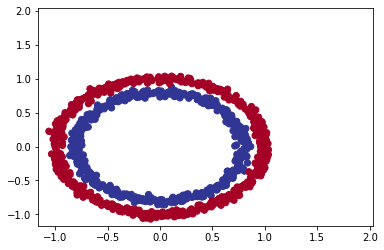

In [16]:
plot_decision_boundary(model=model_2, X=X, y=y)

In [17]:
#creating regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

X_regression, y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

##Exploring Non-linearity

In [18]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_4.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/100
32/32 [=

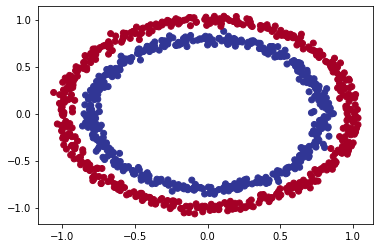

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [20]:
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1),
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_5.fit(X, y, epochs=200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 1.8602 - accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 1.2989 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 1.1709 - accuracy: 0.4930
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 1.0865 - accuracy: 0.4340
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 1.0176 - accuracy: 0.4080
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.9593 - accuracy: 0.4440
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.9133 - accuracy: 0.4520
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.8755 - accuracy: 0.4670
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.8491 - accuracy: 0.4690
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.8277 - accuracy: 0.4690
Epoch 11/200
32/32 [=

In [21]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2852 - accuracy: 0.8360


[0.28521740436553955, 0.8360000252723694]

In [22]:
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_5.fit(X, y, epochs=200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5010
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5110
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5310
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5060
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5100
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.4980
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5080
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5040
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5210
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5100
Epoch 11/200
32/32 [=

In [23]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0937 - accuracy: 0.9930


[0.0937400609254837, 0.9929999709129333]

#Creating a Toy Tensor

In [24]:
A = tf.cast(tf.range(-10, 10), tf.float32)

In [25]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

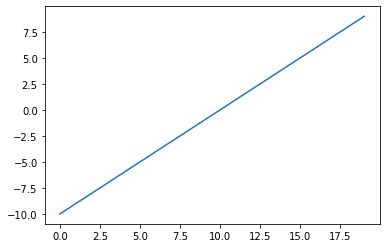

In [26]:
plt.plot(A)

In [27]:
def sigmoid(x):
  return 1/(1 + tf.exp(-1 * x))

In [28]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

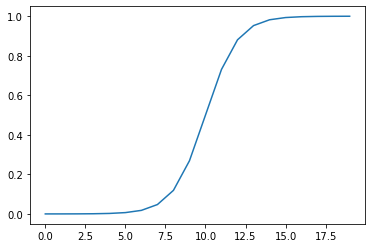

In [29]:
plt.plot(sigmoid(A))

In [30]:
def relu(x):
  return tf.maximum(x, 0)

In [31]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

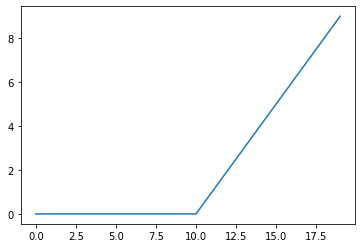

In [32]:
plt.plot(relu(A))

In [33]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [34]:
len(X)

1000

#EValuating and improoving our classification

In [35]:
X_train,X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=30)

In [36]:
X_train

array([[ 0.07637417,  0.79927591],
       [ 0.31334331, -0.99172214],
       [-1.00064635, -0.0045641 ],
       ...,
       [ 0.77500267, -0.10640489],
       [-0.73073113,  0.34332472],
       [-0.98504907,  0.1189595 ]])

In [37]:
X_test

array([[ 8.31658156e-01,  1.10699644e-01],
       [ 9.16025789e-01,  3.89993742e-01],
       [-9.72045843e-01,  3.61654589e-01],
       [-7.38209836e-01,  3.37148322e-01],
       [-3.92458102e-01,  9.45375147e-01],
       [ 7.27428100e-01, -3.33168028e-01],
       [ 7.32943793e-01, -1.15580996e-01],
       [ 5.91304708e-01, -7.39711578e-01],
       [-4.03255317e-01, -6.62036347e-01],
       [-5.02962454e-01,  8.73045819e-01],
       [ 1.87807620e-01, -9.54731369e-01],
       [ 2.68337155e-01, -9.88215562e-01],
       [-6.42490416e-01, -5.44099292e-01],
       [ 8.03103454e-02,  8.00708493e-01],
       [-5.76602624e-01,  5.84079749e-01],
       [ 3.12887650e-01,  7.75557737e-01],
       [ 9.65616710e-01, -4.01765972e-01],
       [ 4.02416825e-01, -7.43753546e-01],
       [-3.75193021e-01,  6.82659723e-01],
       [-7.32711059e-01, -7.42138806e-01],
       [-9.78655091e-01, -2.72373248e-01],
       [ 9.70958043e-01, -3.08188383e-01],
       [ 7.41614129e-01, -2.23074475e-01],
       [ 4.

In [38]:
y_train

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,

In [39]:
len(y_train), len(X_train)

(800, 800)

In [40]:
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

model_8.fit(X_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.7049 - accuracy: 0.4638
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4812
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5088
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5288
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5375
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5362
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5625
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.5562
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.5612
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.5975
Epoch 11/100
25/25 [=

In [41]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 1.0000


[0.010977313853800297, 1.0]

##plot the loss and training of our model

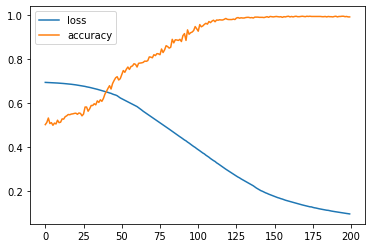

In [42]:
pd.DataFrame(history.history).plot()

##Finding the ideal leanring rate (learning rate where the loss decreases the most during training)
### 1. Learning Rate callback


In [43]:
tf.random.set_seed(30)

model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6991 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5025 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.5025 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.5013 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.5013 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

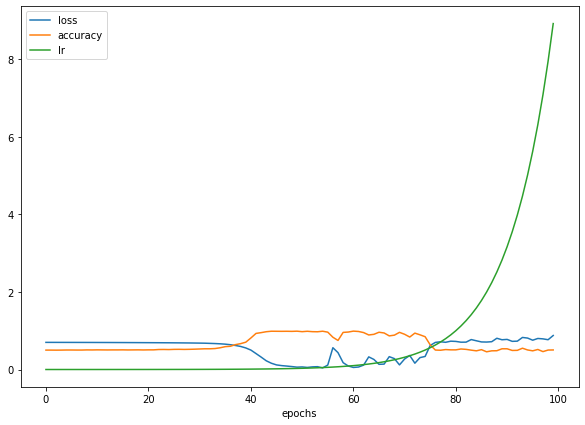

In [44]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

In [45]:
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

history_10 = model_10.fit(X_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5250
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.5275
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.6087
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6422 - accuracy: 0.6087
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5993 - accuracy: 0.6750
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.7525
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.7987
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.8163
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8188
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3520 - accuracy: 0.8637
Epoch 11/100
25/25 [=

In [46]:
#Evaluate MOdel_10
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0671 - accuracy: 0.9800


[0.06708823889493942, 0.9800000190734863]

#more classification evaluation metics
##Accuracy - Default, not the best for unbalanced data
##Precision - Higher precision leads to less false positives
##Recall - Higher reacall leads to less false negatives
####BEWARE PRECISION RECALL TRADEOFF
##f1-score - Combination of precision and recall, usually a good overall metric for a classification model
##Confusion Matrix - When comparing predicitiosn to truth labels to see where the model gets confused. Can be hard to use with large numbers of classes


In [47]:
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set : {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0671 - accuracy: 0.9800
Model loss on the test set: 0.06708823889493942
Model accuracy on the test set : 98.00%


In [48]:
from sklearn.metrics import confusion_matrix
y_preds = model_10.predict(X_test)
y_test, y_preds
#confusion_matrix(y_test, y_preds)

(array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1]), array([[9.86429632e-01],
        [1.00311800e-05],
        [2.81903283e-08],
        [9.99919355e-01],
        [2.76668402e-06],
        [9.99937296e-01],
        [9.99900699e-01],
        [7.31050968e-04],
        [9.99963164e-01],
        [1.27017498e-04],
        [8.69056009e-07],
        [1.30976674e-09],
       

#Y_preds came outin predicition probability form, the standard output from sigmoid acitivation

In [49]:
y_preds = tf.round(y_preds)
y_preds

<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
 

In [50]:
confusion_matrix(y_test, y_preds)

array([[ 90,   3],
       [  1, 106]])

#Making confusion matrix more pretty

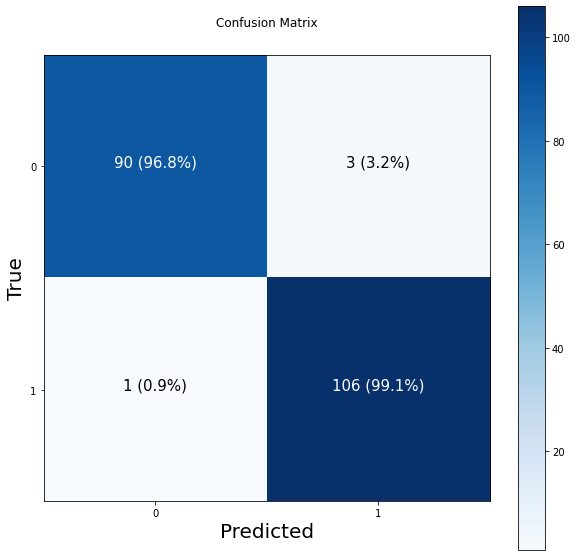

In [51]:
import itertools

figsize= (10,10)

cm = confusion_matrix(y_test, y_preds)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize confusion matrix
cm_norm
n_classes = cm.shape[0]

#prettifiying
fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#create classes
classes = False
if(classes):
  labels = classes
else:
  labels = np.arange(cm.shape[0])

#lable axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted",
       ylabel="True",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)
#set axis labels

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)

threshold = (cm.max() + cm.min()) / 2

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)


#WOrking iwth multiclass classification

#more than 2 options


In [52]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


#data already in training and testing

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [53]:
print(f"Trainging Sample:\n{train_data[0]}")

Trainging Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [54]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

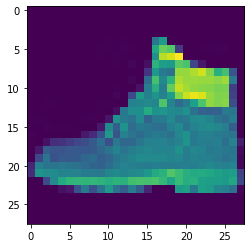

In [55]:
import matplotlib.pyplot as plt
plt.imshow(train_data[90])

In [56]:
#check our label
train_labels[90] #ankle boot

9

In [57]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Ankle boot')

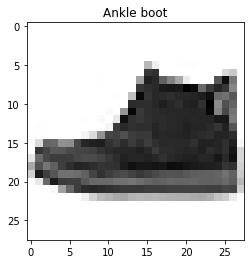

In [58]:
#Plot an example image and label
plt.imshow(train_data[93], cmap=plt.cm.binary)
plt.title(class_names[train_labels[93]])

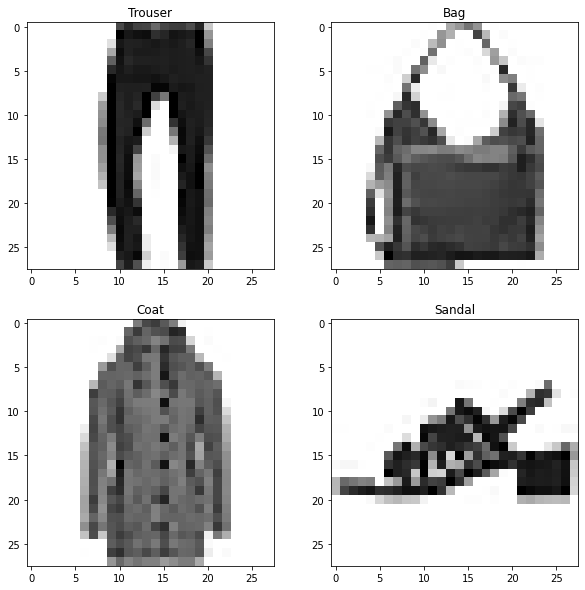

In [59]:
import random
plt.figure(figsize=(10, 10))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])

##building multiclass classification model

In [60]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [61]:
#output shape = num_classses = 10

In [62]:
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(train_data[0].shape)),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2593 - accuracy: 0.2952 - val_loss: 1.5713 - val_accuracy: 0.3949
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2040 - accuracy: 0.5470 - val_loss: 1.1082 - val_accuracy: 0.5556
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0046 - accuracy: 0.6141 - val_loss: 1.0150 - val_accuracy: 0.6118
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9152 - accuracy: 0.6489 - val_loss: 0.9005 - val_accuracy: 0.6607
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8803 - accuracy: 0.6609 - val_loss: 0.8877 - val_accuracy: 0.6555
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8460 - accuracy: 0.6741 - val_loss: 0.8549 - val_accuracy: 0.6726
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8172 - accuracy: 0.6832 - val_loss: 0.8481 - val_accuracy:

In [66]:
train_data_normal = train_data / 255.0
test_data_normal = test_data / 255.0

In [69]:
from sklearn.utils import validation

model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

normal_history = model_12.fit(train_data_normal, train_labels, epochs=10, validation_data=(test_data_normal, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5983 - accuracy: 0.4428 - val_loss: 1.3594 - val_accuracy: 0.5128
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.2102 - accuracy: 0.5495 - val_loss: 1.1491 - val_accuracy: 0.5687
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0937 - accuracy: 0.5887 - val_loss: 1.0612 - val_accuracy: 0.6045
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0081 - accuracy: 0.6437 - val_loss: 0.9673 - val_accuracy: 0.6790
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9103 - accuracy: 0.6973 - val_loss: 0.8873 - val_accuracy: 0.7106
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8482 - accuracy: 0.7194 - val_loss: 0.8542 - val_accuracy: 0.7261
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8078 - accuracy: 0.7329 - val_loss: 0.8239 - val_accurac

In [73]:
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
#create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

normal_history = model_13.fit(train_data_normal, train_labels, epochs=40, validation_data=(test_data_normal, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2835 - accuracy: 0.4867 - val_loss: 0.9789 - val_accuracy: 0.5865 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8844 - accuracy: 0.6172 - val_loss: 0.8618 - val_accuracy: 0.6155 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8089 - accuracy: 0.6411 - val_loss: 0.8082 - val_accuracy: 0.6545 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7796 - accuracy: 0.6670 - val_loss: 0.7901 - val_accuracy: 0.6670 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7590 - accuracy: 0.6846 - val_loss: 0.7728 - val_accuracy: 0.6920 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7433 - accuracy: 0.6985 - val_loss: 0.7574 - val_accuracy: 0.6973 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

ValueError: ignored

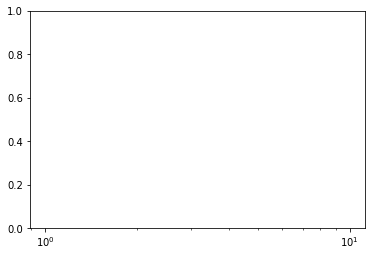

In [72]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * 10**(tf.range(40)/20)
plt.semilogx(lrs, normal_history.history["loss"])

#evaluating our model

In [75]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
  import itertools

  figsize= (10,10)

  cm = confusion_matrix(y_true, y_preds)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize confusion matrix
  cm_norm
  n_classes = cm.shape[0]

  #prettifiying
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #setlables to be classes
  if(classes):
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  #lable axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted",
        ylabel="True",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)
  #set axis labels

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)

  threshold = (cm.max() + cm.min()) / 2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)


In [79]:
#making predictions
y_probs = model_12.predict(test_data_normal)
y_probs

array([[6.3010233e-08, 0.0000000e+00, 7.0157758e-04, ..., 2.7667248e-01,
        5.1494328e-05, 3.5842100e-01],
       [8.9835254e-08, 0.0000000e+00, 6.8202591e-01, ..., 1.0032408e-04,
        3.4022789e-09, 2.3441535e-01],
       [1.5376748e-02, 9.3884552e-01, 8.2733238e-04, ..., 1.2727405e-05,
        8.8825727e-05, 2.5235220e-06],
       ...,
       [6.7509621e-01, 3.5882000e-05, 5.4864620e-04, ..., 8.3404044e-03,
        2.8837010e-01, 3.0988493e-05],
       [1.5376748e-02, 9.3884552e-01, 8.2733238e-04, ..., 1.2727405e-05,
        8.8825727e-05, 2.5235220e-06],
       [5.0045009e-04, 2.4198691e-37, 1.8478880e-02, ..., 1.9358385e-01,
        3.9536925e-03, 7.3218271e-02]], dtype=float32)

In [81]:
y_probs[0], tf.argmax(y_probs[0])

(array([6.3010233e-08, 0.0000000e+00, 7.0157758e-04, 8.5417937e-18,
        9.8895114e-10, 3.6396778e-01, 1.8554699e-04, 2.7667248e-01,
        5.1494328e-05, 3.5842100e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=5>)

In [82]:
tf.argmax(y_probs[0])

<tf.Tensor: shape=(), dtype=int64, numpy=5>

In [83]:
#convert all of prediction probabilities to integrers
y_preds = y_probs.argmax(axis=1)
y_preds[0]

5

#creating a confusion matrix

In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[729,  22,   4, 164,   4,   8,  60,   1,   8,   0],
       [  2, 949,   1,  42,   3,   0,   3,   0,   0,   0],
       [ 24,   2, 488,  56, 302,   2, 122,   0,   3,   1],
       [ 36,  30,   2, 837,  33,   2,  59,   0,   1,   0],
       [  1,   2, 125,  81, 751,   3,  36,   0,   1,   0],
       [  7,   0,   8,   0,   0, 789,  13, 122,   8,  53],
       [183,   2, 213, 188, 196,   5, 196,   0,  17,   0],
       [  0,   0,   0,   0,   0,  75,   0, 876,   5,  44],
       [ 47,   4,   1,   7,   2,  23,   6,  18, 892,   0],
       [  1,   0,   5,   0,   0,  59,   2,  61,   0, 872]])

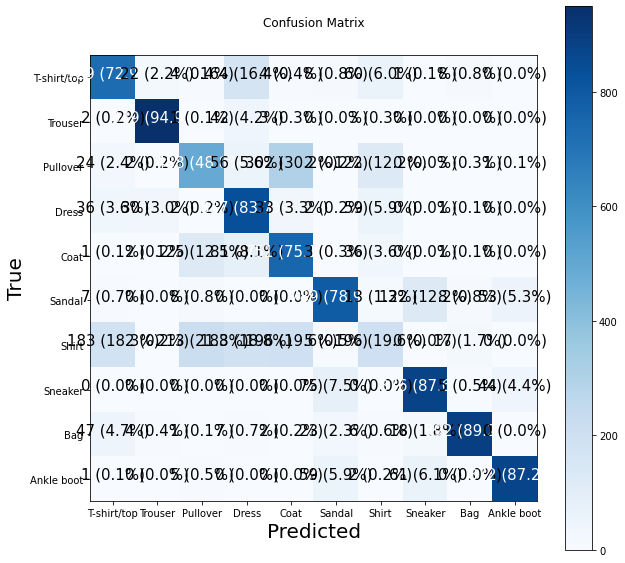

In [86]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(20,20))

#visualizing even more

In [97]:
import random
def plot_random_image(model, images, true_label, classes):
  i = random.randint(0,len(images))

  #create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_label[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  #chang color based on correct or not
  if pred_label == true_label:
    color="green"
  else:
    color="red"
  
  #add x label infor
  plt.xlabel("pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label), color=color)

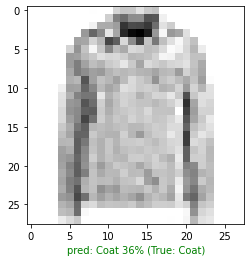

In [115]:
plot_random_image(model_12, test_data_normal, test_labels, class_names)

#what patterns is our model learning?

In [116]:
model_12.layers

In [117]:
#Extract a particular layer
model_12.layers[1]

In [118]:
weights, biases = model_12.layers[1].get_weights()
weights, weights.shape

(array([[ 0.39761376, -0.3413707 , -0.24579865, -0.5124468 ],
        [-0.03638108, -0.2162416 ,  0.02062715,  0.1394405 ],
        [ 0.357419  , -0.34274763, -0.2378151 , -0.39932653],
        ...,
        [ 0.32415098,  0.92438847, -0.12303004, -0.15570241],
        [ 0.7054809 ,  0.6600043 , -0.15416314, -0.5443296 ],
        [ 0.8106772 ,  0.4858759 , -0.16137423, -0.6370454 ]],
       dtype=float32), (784, 4))

In [119]:
biases, biases.shape

(array([ 0.01838618,  1.0499455 , -0.6659475 ,  1.313098  ], dtype=float32),
 (4,))

#Every neuron has a Bias vector, each of these is paired wihta weights matrix
#Bias vecotr gets initialized as zeros
#Bias vector dictates how much the patterns with the weights matrix should influence the next layer

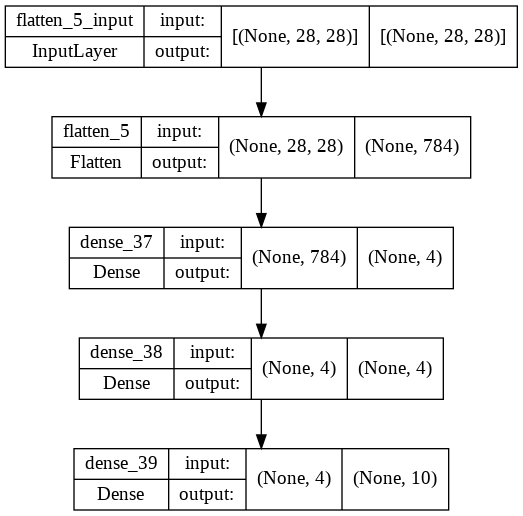

In [120]:
#anothe rway of seeing deep learning models
from tensorflow.keras.utils import plot_model
plot_model(model_12, show_shapes=True)